In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import kagglegym

In [4]:
with pd.HDFStore("../input/train.h5", "r") as train:
    # Note that the "train" dataframe is the only dataframe in the file
    df = train.get("train")

In [5]:
len(df)

1710756

In [4]:
df.tail(10)

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
1710746,2142,1812,-0.223395,-0.042492,-0.060381,0.016019,0.218667,-0.160979,-0.138038,0.348972,...,0.221707,-6.926206e-17,-2.896559e-23,-2.319149e-42,-0.190602,0.078530,-1.442868e-05,-1.660443e-06,0.022390,0.008430
1710747,2145,1812,-0.154051,-0.029331,-0.010545,0.019339,-0.260369,-0.227888,0.006721,0.008255,...,0.242681,-1.350192e-24,-2.675678e-33,-2.536633e-33,0.065731,-0.005486,-5.989458e-12,-1.660443e-06,-0.032458,-0.000711
1710748,2146,1812,-0.238458,0.316407,0.632261,0.531651,-0.154740,0.069316,NaN,-0.543269,...,0.007160,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.585441,0.044880,0.000000e+00,-3.330669e-16,-0.004821,-0.017794
1710749,2148,1812,0.089476,-0.038628,0.776538,8.809832,-0.177850,0.388419,0.193054,0.175415,...,-0.327668,-1.183291e-29,-5.989455e-12,-1.183291e-29,-0.461990,0.395752,-5.989455e-12,-1.999969e+00,-0.022806,-0.001058
1710750,2149,1812,0.254593,0.064668,-0.034742,-1.336611,-0.037401,0.244451,0.049125,-0.130919,...,0.398645,-4.303226e-08,-7.850558e-07,-7.850498e-07,-0.165358,0.003253,-9.948457e-01,-6.892265e-13,-0.027780,-0.001462
1710751,2150,1812,-0.123364,-0.055977,NaN,0.010906,NaN,-0.255730,-0.108285,NaN,...,0.513506,-7.850498e-07,-0.000000e+00,-7.850498e-07,0.258847,-0.082943,4.061612e-27,-2.328306e-10,0.001004,0.004604
1710752,2151,1812,-10.437184,0.080905,NaN,3.369380,NaN,-0.293557,NaN,NaN,...,0.185174,-1.036653e-01,-7.850498e-07,-7.850498e-07,0.144680,0.112681,3.395756e-04,-1.660443e-06,0.044597,-0.009241
1710753,2154,1812,-0.077930,-0.038748,-0.031859,0.646608,-0.145526,-0.119539,-0.151587,-0.130524,...,0.332271,-1.060826e-39,-8.911812e-01,-8.911819e-01,0.046312,0.012560,-8.863969e-01,-1.266820e-11,0.030816,-0.006852
1710754,2156,1812,-0.269845,-0.005322,NaN,-0.117539,NaN,0.214088,-0.307293,NaN,...,0.115957,-1.036645e-01,-1.060828e-39,-1.036645e-01,0.385064,0.142243,4.142751e-37,-1.999260e+00,-0.011706,-0.000785
1710755,2158,1812,NaN,NaN,NaN,NaN,NaN,NaN,-6.456266,NaN,...,1.542186,0.000000e+00,0.000000e+00,0.000000e+00,-0.522720,-0.016260,0.000000e+00,0.000000e+00,NaN,0.003497


In [7]:
len(df[df["timestamp"] == 1000]["id"])

959

In [6]:
df.columns

Index(['id', 'timestamp', 'derived_0', 'derived_1', 'derived_2', 'derived_3',
       'derived_4', 'fundamental_0', 'fundamental_1', 'fundamental_2',
       ...
       'technical_36', 'technical_37', 'technical_38', 'technical_39',
       'technical_40', 'technical_41', 'technical_42', 'technical_43',
       'technical_44', 'y'],
      dtype='object', length=111)

In [7]:
df.columns[20]

'fundamental_14'

In [50]:
pd.set_option('display.max_columns', None)

In [51]:
pd.set_option('display.max_rows',None)

In [10]:
df[df.columns[20]].mean()

3.127454

In [11]:
df['fundamental_14'].mean()

3.127454

In [12]:
df['fundamental_14'].std()

254.66016

In [13]:
Q = df.corr(method='pearson', min_periods=1)

In [14]:
Q

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_22,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_49,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_0,technical_1,technical_2,technical_3,technical_5,technical_6,technical_7,technical_9,technical_10,technical_11,technical_12,technical_13,technical_14,technical_16,technical_17,technical_18,technical_19,technical_20,technical_21,technical_22,technical_24,technical_25,technical_27,technical_28,technical_29,technical_30,technical_31,technical_32,technical_33,technical_34,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
id,1.000000,0.003723,0.026267,0.006481,-0.003113,-5.971169e-03,-0.028646,-0.034317,-0.010725,0.016523,-0.069999,0.007988,0.011878,-0.010475,0.003942,0.005791,-0.005151,0.010416,-0.006450,0.001114,0.002992,0.005301,-0.005930,-0.011106,-0.013058,0.010710,0.008403,-0.012002,0.010780,-0.028041,-0.017493,-0.001784,-0.008793,0.004245,0.009505,-0.001417,0.021021,-0.001682,-0.006687,-0.011483,-1.148412e-03,0.021899,-0.010486,0.020841,0.051047,0.039981,-0.019074,-0.001187,-4.741095e-04,0.003261,0.001683,-0.008144,0.000650,-0.016790,-0.002043,-0.035005,-0.026513,0.004276,-0.005107,-0.003018,-0.007286,0.012100,0.012682,0.014465,0.012272,-0.026653,0.002060,0.010708,0.003956,-0.016855,-0.016392,-0.008368,0.003209,0.001938,-0.006900,0.006322,0.003034,0.019708,0.011738,-0.002320,-0.003287,-0.003230,0.017147,0.001467,0.007084,-0.019438,0.001890,0.008885,0.006164,0.008196,-0.002025,-0.005349,0.014553,-0.005568,0.028907,0.000367,0.001253,-0.022809,-0.006590,0.009525,0.023139,0.027121,-0.018761,-0.009708,-0.007421,0.007662,-0.002169,0.010320,0.027097,0.002948,0.000909
timestamp,0.003723,1.000000,0.021064,0.006743,0.004869,4.509750e-03,-0.022599,-0.057031,0.006340,0.030643,0.045453,0.012389,0.046604,-0.016935,0.074260,-0.008665,0.031232,0.039731,0.020481,0.005355,0.000588,0.030013,-0.007450,-0.014200,-0.035988,-0.003006,0.016208,-0.151022,0.001684,-0.022023,-0.018247,0.030398,-0.015249,-0.000874,0.046662,0.006844,0.002468,0.005994,0.022851,-0.014265,4.180254e-03,0.001739,-0.016873,0.028659,0.155046,0.013583,-0.037926,-0.006297,-8.488339e-03,-0.042955,0.003255,-0.015641,0.006124,0.051813,0.011397,0.023752,-0.021340,0.013861,0.033562,-0.013276,-0.054863,0.040531,0.030907,0.063019,0.007785,-0.015937,0.037186,-0.006322,-0.021090,-0.004530,0.009554,-0.005326,-0.007048,-0.005005,0.000755,-0.013637,0.125892,0.013574,-0.145760,-0.005833,0.009043,-0.003866,-0.081467,0.037699,0.000731,0.035636,-0.000098,0.026341,0.004171,0.002523,-0.001062,0.000354,-0.011583,0.001087,-0.174010,0.015487,-0.006459,0.003101,0.003323,0.007728,-0.135584,-0.053343,0.025998,0.032365,0.029276,0.063004,-0.004856,0.047898,-0.037562,-0.005214,0.001058
derived_0,0.026267,0.021064,1.000000,0.000163,0.000214,-7.547446e-05,-0.962172,0.013534,0.000293,0.010259,-0.002664,-0.000076,0.000274,0.000127,0.002773,-0.030520,-0.000038,0.018678,0.000274,-0.000670,0.000813,-0.002576,0.001258,0.000162,0.005687,-0.000278,-0.000071,-0.013037,0.002889,-0.000203,0.014094,0.002449,-0.000639,-0.000521,-0.000623,-0.000024,

In [21]:
Q.to_csv('out.csv')

In [7]:
cols = np.ones(len(Q))
P = np.array(Q)
print(len(P))

NameError: name 'Q' is not defined

In [6]:
cols = np.ones(len(P))
for i in range(len(P)):
    for j in range(i + 1, len(P)):
        if abs(P[i, j]) > 0.5:
            cols[j] = 0

NameError: name 'P' is not defined

In [36]:
len(cols[cols < 1])

37

In [44]:
df_new = df.drop(df.columns[cols < 1], 1)

In [45]:
df_new.columns

Index(['id', 'timestamp', 'derived_0', 'derived_1', 'derived_2', 'derived_3',
       'fundamental_0', 'fundamental_1', 'fundamental_2', 'fundamental_3',
       'fundamental_5', 'fundamental_6', 'fundamental_7', 'fundamental_8',
       'fundamental_9', 'fundamental_10', 'fundamental_11', 'fundamental_12',
       'fundamental_13', 'fundamental_17', 'fundamental_18', 'fundamental_19',
       'fundamental_21', 'fundamental_23', 'fundamental_24', 'fundamental_25',
       'fundamental_27', 'fundamental_28', 'fundamental_29', 'fundamental_30',
       'fundamental_33', 'fundamental_34', 'fundamental_35', 'fundamental_37',
       'fundamental_38', 'fundamental_40', 'fundamental_41', 'fundamental_43',
       'fundamental_44', 'fundamental_48', 'fundamental_49', 'fundamental_52',
       'fundamental_55', 'fundamental_60', 'fundamental_62', 'fundamental_63',
       'technical_0', 'technical_1', 'technical_2', 'technical_3',
       'technical_5', 'technical_6', 'technical_7', 'technical_9',
       

In [8]:
df["y"].std() / df["y"].max()

0.23981003

In [43]:
ids = sort(df["id"].unique())
len(ids)

1424

In [39]:
data = df[df["id"] == 1067]

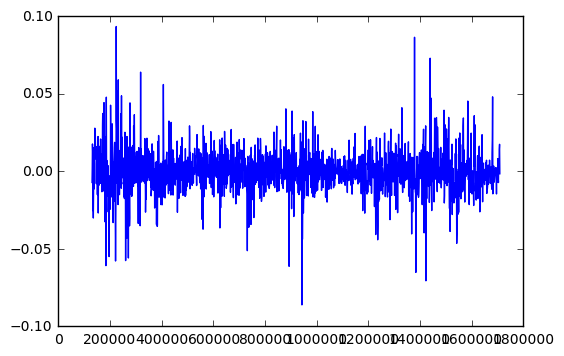

In [10]:
plot(data["y"])

In [44]:
corrs = zeros(100)
for i in range(100):
    corrs[i] = data["y"].autocorr(lag=i)

In [99]:
len(df["y"][:len(df['y'])-171000])

1539756

In [46]:
n = 0
max_v = 0.0
for i in range(1,100):
    if abs(corrs[i]) > max_v:
        max_v = abs(corrs[i])
        n = i
print(n, max_v, corrs[n])

4 0.0889602271497 -0.0889602271497


In [42]:
corrs[980:990]

array([ 0.03806337,  0.13466687,  0.02104327,  0.09257928, -0.07454117,
       -0.21744905, -0.0559274 , -0.08331784, -0.0271315 ,  0.02409703])

In [11]:
data = df[df["id"] == 1200]
corrs = zeros(354)
for i in range(1,354):
    corrs[i] = data['y'].autocorr(lag=i)

/usr/lib/python3.5/site-packages/numpy/lib/function_base.py:2487: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/usr/lib/python3.5/site-packages/numpy/lib/function_base.py:2496: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [14]:
corrs = zeros(len(df['id'].unique()))
ids = df['id'].unique()
for i in range(len(corrs)):
    corrs[i] = df[df['id'] == ids[i]]['y'].autocorr(lag=1)

/usr/lib/python3.5/site-packages/numpy/lib/function_base.py:2487: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/usr/lib/python3.5/site-packages/numpy/lib/function_base.py:2496: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


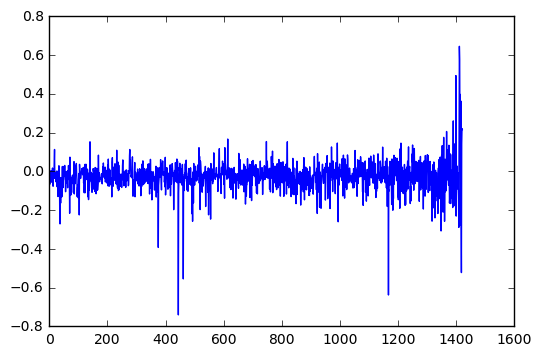

In [15]:
plot(corrs)

In [22]:
for i in range(len(corrs)):
    if corrs[i] != corrs[i]:
        corrs[i] = 0.0
argmin(corrs)

444

In [34]:
big_corrs = []
for i in range(len(corrs)):
    if abs(corrs[i]) > 0.4:
        big_corrs += [i]
len(big_corrs)
print(ids[big_corrs])

[1276 1314 1056  980  546  752 1726]


In [36]:
for i in range(len(big_corrs)):
    print(len(df[df['id'] == ids[big_corrs[i]]]))

18
12
8
12
14
14
14


In [50]:
for i in range(len(big_corrs)):
    print("id at ", ids[big_corrs[i]])
    data = df[df['id'] == ids[big_corrs[i]]]
    cols = data.columns[2:110]
    for j in range(len(cols)):
        all_nan = True
#         print(cols[j], len(data[cols[j]]))
        for k in range(len(data[cols[j]])):
            if (data[cols[j]].values[k] == data[cols[j]].values[k]):
                all_nan = False
                break;
        if all_nan == True:
            print("id", ids[big_corrs[i]], "has column", cols[j], "all nan")
#     print(df[df['id'] == ids[big_corrs[i]]])

id at  1276
id 1276 has column fundamental_1 all nan
id 1276 has column fundamental_3 all nan
id 1276 has column fundamental_5 all nan
id 1276 has column fundamental_6 all nan
id 1276 has column fundamental_9 all nan
id 1276 has column fundamental_17 all nan
id 1276 has column fundamental_22 all nan
id 1276 has column fundamental_24 all nan
id 1276 has column fundamental_25 all nan
id 1276 has column fundamental_26 all nan
id 1276 has column fundamental_27 all nan
id 1276 has column fundamental_28 all nan
id 1276 has column fundamental_31 all nan
id 1276 has column fundamental_35 all nan
id 1276 has column fundamental_38 all nan
id 1276 has column fundamental_47 all nan
id 1276 has column fundamental_49 all nan
id 1276 has column fundamental_57 all nan
id 1276 has column fundamental_61 all nan
id 1276 has column fundamental_63 all nan
id 1276 has column technical_0 all nan
id 1276 has column technical_1 all nan
id 1276 has column technical_3 all nan
id 1276 has column technical_5 all n

In [43]:
len(df[df['timestamp'] < 20]['id'].unique())

750

In [51]:
for i in range(0,1400,140):
    print("id at ", ids[i])
    data = df[df['id'] == ids[i]]
    cols = data.columns[2:110]
    for j in range(len(cols)):
        all_nan = True
#         print(cols[j], len(data[cols[j]]))
        for k in range(len(data[cols[j]])):
            if (data[cols[j]].values[k] == data[cols[j]].values[k]):
                all_nan = False
                break;
        if all_nan == True:
            print("id", ids[i], "has column", cols[j], "all nan")

id at  10
id 10 has column fundamental_5 all nan
id 10 has column technical_25 all nan
id 10 has column technical_28 all nan
id 10 has column technical_31 all nan
id 10 has column technical_44 all nan
id at  406
id 406 has column derived_0 all nan
id 406 has column derived_1 all nan
id 406 has column derived_2 all nan
id 406 has column derived_3 all nan
id 406 has column derived_4 all nan
id 406 has column fundamental_1 all nan
id 406 has column fundamental_2 all nan
id 406 has column fundamental_3 all nan
id 406 has column fundamental_5 all nan
id 406 has column fundamental_6 all nan
id 406 has column fundamental_7 all nan
id 406 has column fundamental_8 all nan
id 406 has column fundamental_9 all nan
id 406 has column fundamental_11 all nan
id 406 has column fundamental_12 all nan
id 406 has column fundamental_13 all nan
id 406 has column fundamental_14 all nan
id 406 has column fundamental_15 all nan
id 406 has column fundamental_16 all nan
id 406 has column fundamental_17 all nan
i

In [94]:
from sklearn import linear_model
ids = df['id'].unique()
beta_mat = zeros((len(ids), 108))

for i in range(len(ids)):
    # print(i)
    data = df[df['id'] == ids[i]]
    mean_vals = data.mean()
    data = data.fillna(mean_vals)
    data = data.fillna(0.0)
#     data = data.dropna(axis=1,how='any')
    
    # Find the columns with the most correlation with y
#     corr_mat[ids[i]] = np.array(data.corr(method='pearson', min_periods=1))[:,len(data.columns) - 1]
    model = linear_model.LinearRegression()
    test_x = np.array(data)[:,2:-1]
    test_y = np.array(data)[:,-1]
    length = len(test_x[:,0])
    width = len(test_x[0,:])
#     print(shape(test_y))
    model.fit(test_x.reshape(length, width), test_y.reshape(length,1))
    beta_mat[i,:] = array(model.coef_)
    

#print(corr_mat)

In [95]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3).fit(array(beta_mat))

In [96]:
kmean.cluster_centers_

array([[  2.26175782e+01,  -1.68091580e+01,  -1.25973502e+01,
         -6.12860740e+00,  -4.98574383e+00,   6.36553369e+00,
          9.94969789e-01,  -5.72476172e+00,   1.04443087e+01,
          2.19766448e+00,  -2.94932070e+00,  -5.81421648e+00,
         -1.53137414e+01,  -2.40953739e+00,  -5.26381607e+00,
         -1.55822889e+01,   1.63435009e+00,  -1.04697708e+00,
         -6.68335726e+00,  -2.61716885e+00,   2.06009020e+01,
         -1.82030200e+01,  -3.99521588e+00,   1.71307488e+01,
         -1.57169205e+01,  -2.86876773e+00,  -9.57060950e+00,
         -2.08558811e+01,  -5.75961739e+00,  -5.47156963e+00,
         -2.90250260e+00,  -9.78950791e+00,   3.50459301e+00,
         -1.94369541e+01,  -3.37779692e+01,  -1.36474607e+01,
         -1.09759135e+01,  -2.15020071e+01,   3.41332081e-01,
         -3.43550860e+00,   1.54158601e+01,   3.03021315e+00,
         -3.97767599e-01,  -7.59491073e-01,   1.45178258e+01,
         -8.94657096e+00,   2.18868918e+01,  -8.46268237e+00,
        